# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию. 

### Предобработка данных

#### Общие сведения

Первым дешлом импортируем необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # чтение файла
pd.set_option('display.max_rows', 50) # увеличим максимум отображаемых строк
pd.set_option('display.max_colwidth', 30)

In [2]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Описание проекта.

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
Ваша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- city_centers_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around_3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around_3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- otal_images — число фотографий квартиры в объявлении

Итак, первым делом посморим что у нас етсь и чего не хватает:

In [3]:
data.shape # параметры таблицы

(23699, 22)

In [4]:
data.info() # информация о типах данных и содержании 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Приведем все наименования к общему, красивому виду

In [5]:
data =data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                        'parks_around3000': 'parks_around_3000', 
                        'ponds_around3000': 'ponds_around_3000',}) # приведем все названия к snake_case

ПОсчитаем количество пропусков

In [6]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропусков много, посмотрим что несут в себе наши данные и как они распределены:

In [7]:
data.describe().T # .T - это просто np.transpose() грубо говоря меняем местами строки и столбцы 

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around_3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around_3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]]

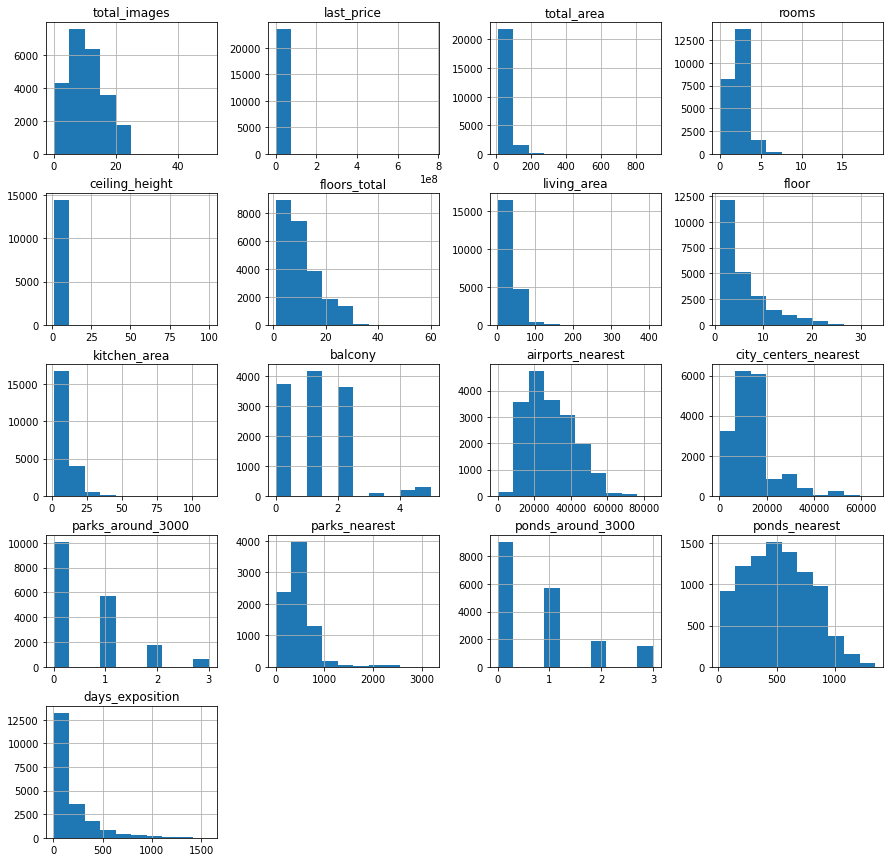

In [8]:
data.hist(figsize=(15, 15)) #  гистограммы числовых стобцов

Некоторые графики получились неинформативными. Можно предположить что в столбцах иеются аномально высокие значения, потому остальные данные группируются в 1-2 столбца гистограммы. 
- total_images — число фотографий квартиры в объявлении - количество фотографий в опубликовыанных объявлениях. 0-20 фотографий это основная масса, большинство объявлений содержат от 5 до 10 фотографий.
- total_area — общая площадь квартиры в квадратных метрах (м²) -  В основном площать продаваемых кватрир до 80м², ~16000 объявлений с площадью < 40м2. Лучшее предложение в 900м²!!!
- rooms — число комнат - Основная масса объявлений - 1-2х комнатные квартиры. Максимум 19 комнат - эксклюзив или выброс?
- ceiling_height — высота потолков (м) Миниму 1м - тут что-то не так, максимум 100 - тоже маловероятно, 2.65 - медиана похожа на реальное значение.
- floors_total — всего этажей в доме - более 8000 квартир в домах не выше 5ти этажей, ~ 7500 квартир в домах высотой от 5ти до 10ти этажей. Практически не т предложений в домах выше 30ти этажей. 60ти этажный дом -малолвероятно.
- living_area — жилая площадь в квадратных метрах (м²) картина схожа с total_area, внимание привлекает максимальные 409 м², похоже все-таки на эксклюзивное предложение.
- floor — этаж -как и ожидалось, наибольшая часть квартир расположена на нижних этажах(не выше 4го), самый высокий этаж 33.
- kitchen_area — площадь кухни в квадратных метрах (м²) - кухни в квартирах в основном скромные меньше 12 м2, хотя есть и отличные предложения где кухня больше 50 и даже 112 м²!
- balcony — число балконов -количество квартир без балкона и квартир с 2мя балконами примерно одинаково, чуть больше предложений с одним балконом. Есть предложения где балконов 5 - может тот самы эксклюзив) Много пропусков - возможно не считают нужным указывать, либо частные дома?
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м) -в половине объявлений расстояние до аэропорта 20км +/- 10км
- city_centers_nearest — расстояние до центра города (м) -более 3000 объявлений о продаже квартир в центре и около 12000 в радиусе 20км от центра.
- parks_around_3000 и park_nearest - в половиен случаев парков в пешей доступноти нет, а если есть, то зачастую не дальше 1км. 
- ponds_around_3000 и ponds_nearest - с водоемами ситуация схожая: либо их нет, либо очень близко, не больше 1км, за редким исключением. 
- days_exposition  В основном объявления не старше полугода, около 5000 опубликованы менее 50 дней назад, остальные старше.

In [9]:
data.duplicated().sum()

0

<AxesSubplot:>

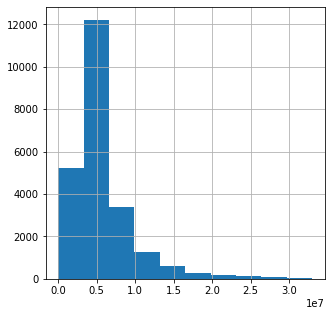

In [10]:
data['last_price'].hist(range=(0, 33000000), figsize=(5, 5))

Примерно у половины квартир цена продажи ~ 5млн.руб и четверть ~2.5млн.руб

<AxesSubplot:>

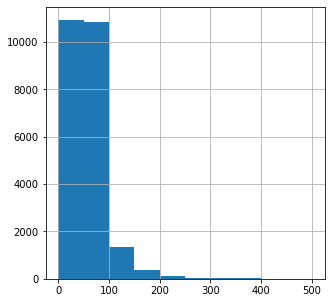

In [11]:
data['total_area'].max()
data['total_area'].hist(range=(0, 500), figsize=(5, 5))

Большинсво продавемых помещений имеют площадь до 100м2

<AxesSubplot:>

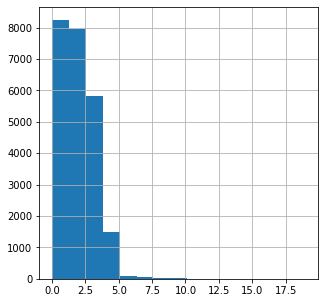

In [12]:
data['rooms'].hist(bins=15, figsize=(5, 5))

Основная масса объявлений - 1-2х комнатные квартиры. 

- в признаках, добавленных пользователями и касающихся характеристик жилой площади, есть аномально высокие показатели, необходимо разобраться в их природе + обработать пропуски.
- в картографических признаках примерно одинаковое воличество пропусков, возможно техническая накладка.

In [13]:
data.select_dtypes(include=['object', 'bool'])

,first_day_exposition,is_apartment,studio,open_plan,locality_name
0,2019-03-07T00:00:00,NaN,False,False,Санкт-Петербург
1,2018-12-04T00:00:00,NaN,False,False,посёлок Шушары
2,2015-08-20T00:00:00,NaN,False,False,Санкт-Петербург
3,2015-07-24T00:00:00,NaN,False,False,Санкт-Петербург
4,2018-06-19T00:00:00,NaN,False,False,Санкт-Петербург
...,...,...,...,...,...
23694,2017-03-21T00:00:00,NaN,False,False,Санкт-Петербург
23695,2018-01-15T00:00:00,NaN,False,False,Тосно
23696,2018-02-11T00:00:00,NaN,False,False,село Рождествено
23697,2017-03-28T00:00:00,NaN,False,False,Санкт-Петербург


Неободимо перевести столбец first_day_exposition  к формату даты. Очень много пропусков в is_apartment.

#### Работа с пропусками и дубликатами 

Пойдем по порядку, чтобы ничего не пропустить.
Спрева разберемся с датами.

In [14]:
data['first_day_exposition']

0        2019-03-07T00:00:00
1        2018-12-04T00:00:00
2        2015-08-20T00:00:00
3        2015-07-24T00:00:00
4        2018-06-19T00:00:00
                ...         
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, Length: 23699, dtype: object

In [15]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d') # время выгрузки одинаковое, поэтому откинем

**ceiling_height** - первый столбец с пропусками

In [16]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Исправим опечатки

In [17]:
data.loc[data['ceiling_height'] > 12, 'ceiling_height'] = data.loc[data['ceiling_height'] > 12, 'ceiling_height']/10

Разберемся с минимальными значениями

In [18]:
len(data.loc[data['ceiling_height'] < 2.5, 'ceiling_height'])

77

НУ уж меньше то быть не может

In [19]:
data.loc[data['ceiling_height'] < 2.5, 'ceiling_height'] = 2.5

Попробуем разобраться с пропусками

In [20]:
data['ceiling_height'].describe() # было

count    14504.000000
mean         2.729835
std          0.304165
min          2.500000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.300000
Name: ceiling_height, dtype: float64

In [21]:
data['ceiling_height'].isnull().sum()# было

9195

In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(verbose=2)

data['ceiling_height'] = imputer.fit_transform(data[['ceiling_height']])

In [23]:
data['ceiling_height'].describe() # стало

count    23699.000000
mean         2.729835
std          0.237948
min          2.500000
25%          2.600000
50%          2.729835
75%          2.729835
max         10.300000
Name: ceiling_height, dtype: float64

In [24]:
data['ceiling_height'].isnull().sum() # стало

0

Тип данных оставим Float, но округлим занчания до десятых

In [25]:
data['ceiling_height'] = data['ceiling_height'].round(1)

**floors_total / floor** -  маленький пропуск в этажности домов, заполним его этажами из объявлений поменяем тип данных на int

In [26]:
data['floors_total'].describe() 

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [27]:
data['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Пропусков в столбце не много и я не придумал ничего лучше, чем присвоить этаж квартиры в объявлении к высоте дома. Думаю это сильно не повлияет на качество данных. 

In [28]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])

In [29]:
data['floors_total'] = data['floors_total'].astype('int') # изменим тип данных на 'int'

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [31]:
data['floors_total'].isnull().sum() # нулевых значений нет

0

In [32]:
len(data[['floors_total', 'floor']].query('floors_total < floor')) # этажей выше дома нет)

0

Я не нашел информаци о жилых домах выше 37 этажей, поэтому принял решения 2 записи принять за ошибочные и принять за максимум этаж квартиры. [Wiki](https://ru.wikipedia.org/wiki/%D0%9A%D0%BD%D1%8F%D0%B7%D1%8C_%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80_%D0%9D%D0%B5%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_(%D0%B6%D0%B8%D0%BB%D0%BE%D0%B9_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BB%D0%B5%D0%BA%D1%81))

In [33]:
data[['floors_total', 'floor']].query('floors_total > 37')

,floors_total,floor
2253,60,4
16731,52,18


In [34]:
print(f'{data.iloc[2253]}\n\n {data.iloc[16731]}')

total_images                             12
last_price                        3800000.0
total_area                             45.5
first_day_exposition    2018-06-28 00:00:00
rooms                                     2
ceiling_height                          2.9
floors_total                             60
living_area                            27.4
floor                                     4
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                            7.4
balcony                                 NaN
locality_name                     Кронштадт
airports_nearest                    67763.0
city_centers_nearest                49488.0
parks_around_3000                       2.0
parks_nearest                         342.0
ponds_around_3000                       3.0
ponds_nearest                         614.0
days_exposition                       166.0
Name: 2253, dtype: object

 tota

In [35]:
data.loc[data['floors_total'] > 37, 'floors_total'] = data.loc[data['floors_total'] > 37, 'floor']

**is_apartment** В России апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания. Апартаменты продаются в административных зданиях, а также в зданиях, имеющих статус гостиницы.

In [36]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [37]:
(
    data[['is_apartment', 'last_price', 'total_area', 'studio', 'open_plan', 'locality_name', 'kitchen_area']]
    .query('is_apartment == True')
    .sort_values(by='last_price', ascending=False)
    .sort_values(by='total_area', ascending=False).head(20)
)

,is_apartment,last_price,total_area,studio,open_plan,locality_name,kitchen_area
8018,True,84000000.0,507.0,False,False,Санкт-Петербург,45.5
7521,True,43500000.0,245.8,False,False,Санкт-Петербург,25.0
10867,True,56844500.0,177.9,False,False,Санкт-Петербург,87.2
2759,True,7500000.0,152.0,False,False,Всеволожск,NaN
10390,True,30000000.0,137.0,False,False,Санкт-Петербург,12.0
6353,True,11620701.0,122.3,False,False,Санкт-Петербург,NaN
5654,True,9200000.0,116.0,False,False,Выборг,32.0
8252,True,12750000.0,102.0,False,False,Колпино,12.0
14603,True,13490000.0,100.6,False,False,Санкт-Петербург,NaN
6561,True,10500000.0,100.0,False,False,Санкт-Петербург,NaN


Из общего у аппартаментов - отсутствие свободной планировки и и факт, что помещения не "студии", но логика подсказывает - это не причина все квартиры такого типа назначать апартаментами. Будем считать это ошибкой при выгрузке, либо заполнении данных (необходимо разобраться с этим вопросом отдельно) и присвоим пропускам значение *False*

In [38]:
data['is_apartment'].fillna(False, inplace=True)

**balcony** наличие балкона. Чеестно в голову не приходит ни однго признака по которому можно определить наличие балкона. Поэтому считаю пропуски в столбце ошибкой при заполнении\выгрузке и заменю на 0. 

In [39]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [40]:
data['balcony'] =  data['balcony'].fillna(0).astype(np.int64)

**total_area** пропусков нет.     Наконец параметр от которого можно было бы отталкиваться.

In [41]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

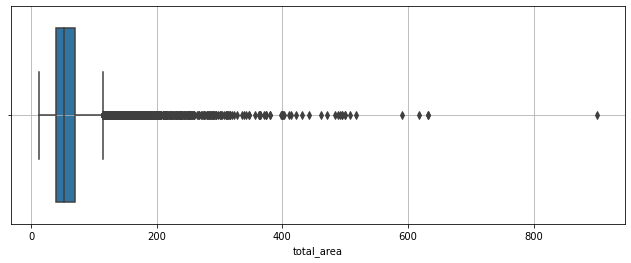

In [42]:
plt.figure(figsize=(11, 4))
sns.boxplot(x=data['total_area'])
plt.grid();

Длинный хвост вправо, чтобы сильно не урезать даныые избавимся от явных выбросов. Большие кваритры тоже часть рынка, пусть их не так много, но совсем избавляться не стоит.

In [43]:
len(data.query('total_area > 400'))

23

In [44]:
data = data.loc[data['total_area'] <= 400]

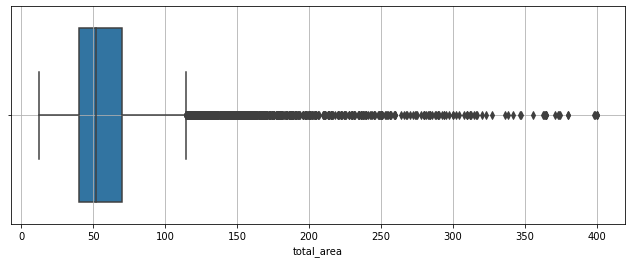

In [45]:
plt.figure(figsize=(11, 4))
sns.boxplot(x=data['total_area'])
plt.grid();

In [46]:
data['total_area'].describe() # - 23 записи

count    23676.000000
mean        59.913148
std         32.645518
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        400.000000
Name: total_area, dtype: float64

Для удобства дальнейших рассчетов сгруппируем данные

In [47]:
def classify_ad(area):
    try:
        if 0 < area < 26:
            return 'G'
        elif 26 <= area < 41:
            return 'F'
        elif 41 <= area < 60:
            return 'E'
        elif 60 <= area < 80:
            return 'D'
        elif 80 <= area < 101:
            return 'C'
        elif 101 <= area < 151:
            return 'B'
        elif area >= 151:
            return 'A'
    except:
        pass

In [48]:
data['area_category'] = data['total_area'].apply(classify_ad)
data['area_category'].unique()

array(['B', 'F', 'E', 'A', 'C', 'D', 'G'], dtype=object)

**living_area** жилай площадь. Пропусков не много.

In [49]:
data['living_area'].describe()

count    21779.000000
mean        34.267705
std         20.845024
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        264.500000
Name: living_area, dtype: float64

In [50]:
data['living_area'].isna().sum()

1897

Посмотрим поближе на аномально низкие значения.13915 и 23574 похоже на опечатку(возможно перепутан столбец с количеством комнат)

In [51]:
(
    data[['total_area', 'last_price', 'rooms', 'studio', 'living_area', 'kitchen_area', 'area_category']]
    .sort_values(by='living_area').head(10)
)

,total_area,last_price,rooms,studio,living_area,kitchen_area,area_category
21758,23.0,2330000.0,0,True,2.0,NaN,G
13915,52.0,6350000.0,2,False,2.0,9.0,E
3242,41.0,4440000.0,1,False,3.0,11.0,E
23574,139.0,64990000.0,3,False,3.0,16.0,B
17582,22.0,2680000.0,0,True,5.0,NaN,G
21943,77.6,6100000.0,4,False,5.4,9.8,D
16431,31.0,3799000.0,1,False,6.0,17.0,F
19251,33.0,4050000.0,1,False,6.5,18.0,F
23208,37.0,4800000.0,1,False,8.0,22.0,F
20994,50.6,8900000.0,2,False,8.0,31.0,E


In [52]:
data.pivot_table(index='area_category', values='living_area').T.round(2)

area_category,A,B,C,D,E,F,G
living_area,120.33,69.58,51.66,40.64,28.37,17.48,15.79


Заполним пропуски произведением total_area и отношения средних величин living_area к total_area согласно категории.

In [53]:
for i in data['area_category'].value_counts().index:
    data['living_area'] = (data['living_area'].fillna(data['total_area'] * 
    (data.loc[data['area_category'] == i, 'living_area'].mean() / 
    data.loc[data['area_category'] == i, 'total_area'].mean())))

In [54]:
data.loc[13915, 'living_area'] = 28.37
data.loc[23574, 'living_area'] = 69.58
data.loc[data['living_area'] < 6, 'living_area'] = 6

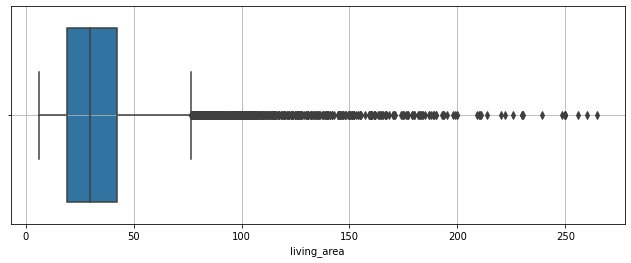

In [55]:
plt.figure(figsize=(11, 4))
sns.boxplot(x=data['living_area'])
plt.grid();

In [56]:
data[['total_area', 'living_area']].query('total_area < living_area') # значений жилой площади > общей нет)

,total_area,living_area


In [57]:
data['living_area'] = data['living_area'].round(1)

**kitchen_area** тоже имеются пропуски.

In [58]:
data['kitchen_area'].describe() # было

count    21401.000000
mean        10.537638
std          5.762154
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

Заполним аналогично предыдущему столбцу, ссогласно группам.

In [59]:
for i in data['area_category'].value_counts().index:
    data['kitchen_area'] = (data['kitchen_area'].fillna(data['total_area'] * 
    (data.loc[data['area_category'] == i, 'kitchen_area'].mean() / 
    data.loc[data['area_category'] == i, 'total_area'].mean())))

In [60]:
data['kitchen_area'].describe() # стало

count    23676.000000
mean        10.494465
std          5.875449
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

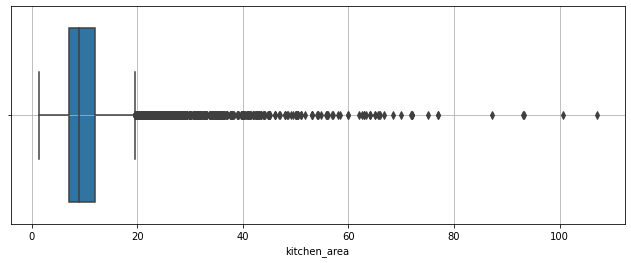

In [61]:
plt.figure(figsize=(11, 4))
sns.boxplot(x=data['kitchen_area'])
plt.grid();

Проверим на соответствие с общей площадью:

In [62]:
(
    data[['total_area', 'living_area', 'kitchen_area']]
    .query('total_area < living_area + kitchen_area')
)

,total_area,living_area,kitchen_area
184,30.20,26.1,6.200000
424,98.00,88.0,17.645842
440,27.11,24.8,4.881416
545,23.80,20.0,5.000000
551,31.59,30.6,9.280000
...,...,...,...
22246,27.30,23.3,4.915627
22907,228.00,200.0,41.053592
23102,66.00,55.5,11.883935
23191,18.90,16.0,3.403127


непорядок, 125 таких объявлений и разница в них небольшая, 16.0 по медиане:

In [63]:
miss = []
for i in data[['total_area', 'living_area', 'kitchen_area']].query(
    'total_area < living_area + kitchen_area').index:
    
    miss.append(data.loc[i, 'total_area'] - data.loc[i, 'living_area'] + data.loc[i, 'kitchen_area'])
    
np.median(miss)

16.0

Добавим к общей площади:

In [64]:
for i in data[['total_area', 'living_area', 'kitchen_area']].query(
    'total_area < living_area + kitchen_area').index:
    
    data.loc[i, 'total_area'] = data.loc[i, 'living_area'] + data.loc[i, 'kitchen_area']

In [65]:
(
    data[['total_area', 'living_area', 'kitchen_area']]
    .query('total_area < living_area + kitchen_area')
)

,total_area,living_area,kitchen_area


Отлично, все в нормах логики)

**studio** пропусков нет

In [66]:
data['studio'].describe() # пропусков нет, 2 уникальных значения

count     23676
unique        2
top       False
freq      23527
Name: studio, dtype: object

In [67]:
data.query('studio and (rooms > 1)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,area_category


**open_plan** свободная планировка:

In [68]:
data['open_plan'].describe() # пропусков нет, 2 уникальных значения

count     23676
unique        2
top       False
freq      23609
Name: open_plan, dtype: object

**rooms** количество комнатю Пропусков нет, проверим на аномальные значения.

In [69]:
data['rooms'].describe()

count    23676.000000
mean         2.066523
std          1.067564
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

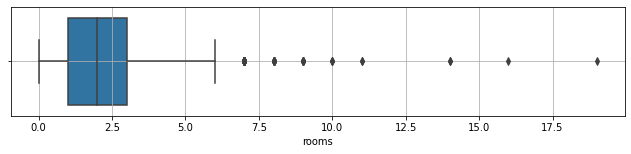

In [70]:
plt.figure(figsize=(11, 2))
sns.boxplot(x=data['rooms'])
plt.grid();

In [71]:
data[data['rooms'] > 8]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,area_category
648,3,17500000.0,183.7,2018-07-01,11,3.4,7,138.8,7,False,...,0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN,A
866,5,25000000.0,363.0,2017-12-23,14,3.2,5,222.0,4,False,...,0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0,A
4149,6,23000000.0,272.6,2018-01-11,10,3.1,7,145.9,7,False,...,1,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,NaN,A
8822,14,49968900.0,398.0,2017-07-12,9,3.0,2,160.1,1,False,...,0,Санкт-Петербург,17720.0,16722.0,3.0,471.0,2.0,440.0,471.0,A
8860,12,17000000.0,235.0,2018-07-14,9,3.0,6,135.5,3,False,...,0,Санкт-Петербург,24466.0,5034.0,1.0,346.0,0.0,NaN,90.0,A
9550,10,23500000.0,313.0,2017-02-13,9,3.2,6,179.2,5,False,...,0,Санкт-Петербург,38435.0,10138.0,1.0,146.0,0.0,NaN,NaN,A
9688,8,33000000.0,194.1,2017-02-07,11,3.4,5,129.0,2,False,...,0,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0,A
13019,0,22250000.0,249.9,2019-04-23,9,3.2,5,157.0,5,False,...,0,Санкт-Петербург,10328.0,9987.0,2.0,352.0,0.0,NaN,NaN,A
13397,14,19500000.0,309.7,2016-02-03,9,2.7,5,199.0,5,False,...,0,Санкт-Петербург,10328.0,9987.0,2.0,352.0,0.0,NaN,468.0,A
14498,6,32250000.0,374.6,2018-06-09,19,2.7,5,264.5,2,False,...,0,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0,A


Предлагаю ограничиться квартирами с количеством комнат менее 8

In [72]:
data = data[data['rooms'] < 8]

**last_price** - цена, наша целевая переменная. Пропусков нет, хвост вправо

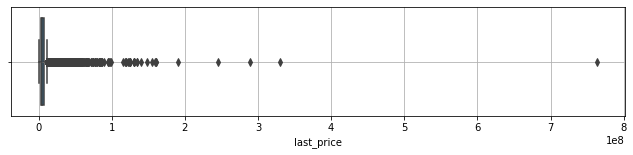

In [73]:
plt.figure(figsize=(11, 2))
sns.boxplot(x=data['last_price'])
plt.grid();

In [74]:
data['last_price'].describe()

count    2.364700e+04
mean     6.384660e+06
std      9.435128e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.626540e+06
75%      6.750000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Откинем самые редкие и дорогие

In [75]:
len(data[data['last_price'] >= 40000000])

169

In [76]:
data = data[data['last_price'] < 40000000]

In [77]:
data.sort_values('last_price').head() # помотрим на минимальные значения

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,area_category
8793,7,12190.0,109.0,2019-03-20,2,2.8,25,32.0,25,False,...,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,B
14911,5,430000.0,54.0,2018-06-26,2,2.7,3,31.1,3,False,...,0,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0,E
17456,7,430000.0,30.4,2019-04-22,1,2.7,2,16.0,1,False,...,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
16274,18,440000.0,40.0,2018-07-10,1,2.7,5,23.1,1,False,...,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0,F
17676,0,450000.0,36.5,2018-02-01,1,2.7,5,17.3,4,False,...,1,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0,F


In [78]:
data.loc[8793, 'last_price']

12190.0

Явно опечатка, добавим нулей нашему минимальному значению.

In [79]:
data.loc[8793, 'last_price'] = 12190000

In [80]:
data[['last_price']].describe().T

,count,mean,std,min,25%,50%,75%,max
last_price,23478.0,5.874630e+06,4.506249e+06,430000.0,3400000.0,4600000.0,6700000.0,39990000.0


Сократим лишние нули для удобства чтения данных.

In [81]:
data['last_price'] = data['last_price'] / 1000

In [82]:
data['last_price'] = data['last_price'].round().astype('int')

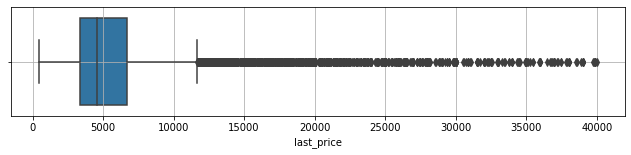

In [83]:
plt.figure(figsize=(11, 2))
sns.boxplot(x=data['last_price'])
plt.grid();

In [84]:
data[['last_price']].describe().T

,count,mean,std,min,25%,50%,75%,max
last_price,23478.0,5874.630505,4506.249346,430.0,3400.0,4600.0,6700.0,39990.0


 Отклонение по цене теперь 4.5 млн, а максимум не превышает 40 млн. 

**locality_name** - название населённого пункта

In [85]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [86]:
data['locality_name'].nunique()

364

Заполним пропуски на основании расстояния до аэропорта.

In [87]:
data = data.sort_values(['airports_nearest'])
data.head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,area_category
21085,0,7000,34.70,2018-09-23,1,2.7,9,19.8,3,False,...,2,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0,F
12899,8,4199,56.00,2017-12-21,2,2.7,9,27.0,5,False,...,0,Санкт-Петербург,6450.0,17461.0,0.0,NaN,1.0,444.0,24.0,E
4017,7,2268,35.00,2017-12-21,1,2.7,9,14.0,6,False,...,0,Санкт-Петербург,6450.0,17461.0,0.0,NaN,1.0,444.0,25.0,F
7778,9,2750,29.00,2017-02-19,1,2.5,4,15.0,1,False,...,0,Санкт-Петербург,6914.0,21486.0,1.0,215.0,0.0,NaN,43.0,F
23150,3,6490,62.50,2015-03-18,2,2.7,24,33.5,15,False,...,4,Санкт-Петербург,6949.0,13165.0,1.0,711.0,0.0,NaN,917.0,D
5074,18,3500,28.00,2017-07-10,0,2.6,25,20.0,17,False,...,0,Санкт-Петербург,6989.0,13205.0,1.0,535.0,0.0,NaN,28.0,F
15633,4,6420,67.00,2015-09-18,2,2.7,24,38.0,11,False,...,1,Санкт-Петербург,6989.0,13205.0,1.0,535.0,0.0,NaN,311.0,D
10059,0,5800,47.30,2017-12-01,2,2.5,25,27.5,18,False,...,2,Санкт-Петербург,6989.0,13205.0,1.0,535.0,0.0,NaN,89.0,E
22283,20,6290,54.90,2019-03-17,2,2.5,14,34.4,5,False,...,0,Санкт-Петербург,6989.0,13205.0,1.0,535.0,0.0,NaN,NaN,E
5062,11,6000,53.00,2017-12-12,2,2.5,14,32.0,6,False,...,1,Санкт-Петербург,6989.0,13205.0,1.0,535.0,0.0,NaN,60.0,E


In [88]:
data['locality_name'] = data['locality_name'].fillna(method='ffill')

In [89]:
data['locality_name'].isna().sum()

0

In [90]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True) # Замаеним ё на е в названиях населенных пунктов.
data['locality_name'].nunique()

330

Создадим новый столбец и поместитм туда тип населенного пункта, а в исходной колонке оставим только название

In [91]:
def parser(name):
    res = ' '.join(word for word in name.split(' ') if word.islower()) # склеим все слова нижнего регистра
    if res == '': # если таких не было - заменить значение на 1
        res = '1'
    return res

In [92]:
data['area_type'] = data['locality_name'].fillna('').apply(parser)

In [93]:
data['area_type'].unique()

array(['1', 'поселок', 'городской поселок', 'деревня',
       'поселок городского типа', 'садовое товарищество', 'село',
       'поселок городского типа имени', 'поселок станции',
       'садоводческое некоммерческое товарищество',
       'поселок 69-й километр', 'поселок при железнодорожной станции',
       'коттеджный поселок'], dtype=object)

Сократим количество схожих наименований.

In [94]:
replace_dict = {
    'городской поселок' : 'пгт',
    'поселок городского типа имени' : 'пгт',
    'поселок городского типа' : 'пгт',
    'поселок станции' : 'пгт',
    'поселок 69-й километр' : 'поселок',
    'поселок при железнодорожной станции' : 'поселок',
    'садоводческое некоммерческое товарищество': 'садовое товарищество', 
    '1' : 'город'
}

In [95]:
def replace (text):
    for key, value in replace_dict.items():
        text = text.replace(key, value)
    return text

In [96]:
data['area_type'] = data['area_type'].apply(replace)

In [97]:
data['area_type'].unique()

array(['город', 'поселок', 'пгт', 'деревня', 'садовое товарищество',
       'село', 'коттеджный поселок'], dtype=object)

А теперь в locality_name оставим только название.

In [98]:
def parser2(name):
    res = ' '.join(word for word in name.split(' ') if word.istitle())
    if res == 'Платформа':
        res = 'Платформа 69-й километр'
    return res

In [99]:
data['locality_name'] = data['locality_name'].fillna('').apply(parser2)

In [100]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Пушкин', 'Александровская',
       'Павловск', 'Петро-Славянка', 'Колпино', 'Красное Село',
       'Металлострой', 'Усть-Ижора', 'Стрельна', 'Понтонный', 'Саперный',
       'Петергоф', 'Парголово', 'Ломоносов', 'Сестрорецк', 'Мурино',
       'Песочный', 'Левашово', 'Лисий Нос', 'Белоостров', 'Репино',
       'Щеглово', 'Кронштадт', 'Зеленогорск', 'Молодежное', 'Янино-1',
       'Сертолово', 'Кудрово', 'Коммунар', 'Красный Бор', 'Гатчина',
       'Федоровское', 'Выборг', 'Кировск', 'Новое Девяткино', 'Лебяжье',
       'Сиверский', 'Молодцово', 'Кузьмоловский', 'Новая Ропша',
       'Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Сясьстрой', 'Старая', 'Лесколово',
       'Новый Свет', 'Сланцы', 'Путилово', 'Ивангород', 'Шлиссельбург',
       'Никольское', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кир

In [101]:
data['locality_name'].isna().sum()

0

**days_exposition** - дата снятия с публикации. Пропуски возможно говорят о том, что объявления еще опубликованы.

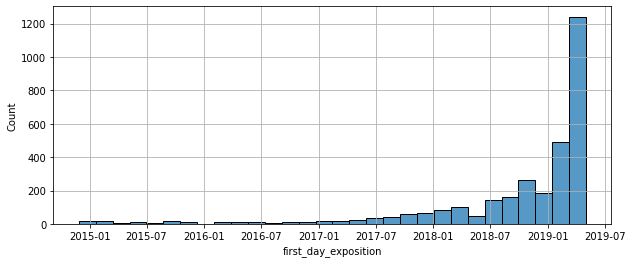

In [102]:
plt.figure(figsize=(10, 4))
sns.histplot(data.query('days_exposition.isna()')['first_day_exposition'], bins=30,)
plt.grid();

Похоже так и есть, оставим пропуски как есть. Тип данных в столбце изменим на int.

In [103]:
data['days_exposition'] = data['days_exposition'].round().astype('Int64')

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23478 entries, 21085 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23478 non-null  int64         
 1   last_price            23478 non-null  int64         
 2   total_area            23478 non-null  float64       
 3   first_day_exposition  23478 non-null  datetime64[ns]
 4   rooms                 23478 non-null  int64         
 5   ceiling_height        23478 non-null  float64       
 6   floors_total          23478 non-null  int64         
 7   living_area           23478 non-null  float64       
 8   floor                 23478 non-null  int64         
 9   is_apartment          23478 non-null  bool          
 10  studio                23478 non-null  bool          
 11  open_plan             23478 non-null  bool          
 12  kitchen_area          23478 non-null  float64       
 13  balcony     

**airports_nearest, city_centers_nearest, parks_nearest, parks_around_3000, ponds_nearest, ponds_around_3000** даныые получены не от пользователей. Скорее всего заполняюся на основании **locality_name**, а так как пользователи заполняют этот столбец как придется - иногда системе не удается определить населенный пункт. Необходимо создать словарь населенных пуктов и ограничить пользователей выбором из него. А мы сейчас оставимь пропуски как есть.  

In [105]:
float_to_int = ['airports_nearest', 'city_centers_nearest', 'parks_around_3000', 
                'parks_nearest', 'ponds_around_3000', 'ponds_nearest']
for i in float_to_int:
    data[i] = data[i].round().astype('Int64')

In [106]:
print(f'{data.info()}\n\n{data.isna().sum()}')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23478 entries, 21085 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23478 non-null  int64         
 1   last_price            23478 non-null  int64         
 2   total_area            23478 non-null  float64       
 3   first_day_exposition  23478 non-null  datetime64[ns]
 4   rooms                 23478 non-null  int64         
 5   ceiling_height        23478 non-null  float64       
 6   floors_total          23478 non-null  int64         
 7   living_area           23478 non-null  float64       
 8   floor                 23478 non-null  int64         
 9   is_apartment          23478 non-null  bool          
 10  studio                23478 non-null  bool          
 11  open_plan             23478 non-null  bool          
 12  kitchen_area          23478 non-null  float64       
 13  balcony     

**Итак, подведем итог проделанным манипуляциям:**

- последовательно рассмотрели каждый признак, уникальные значения и расперделение данных; 
- заполнили пропуски значений там, где это поситали необходимым;
- удалили из датафрейма объявления с чрезмерно большой площадью total_area, количеством комнат rooms и ценой last_price;
- добавили категоризацию по площади жилья;
- добавили категоризацию по населенному пункту;
- изменили тип данных у некоторых признаков;
- признак с названиями населённых пунктов locality_name привели к единому виду;

**проделанные шаги должны помочь в дальнейшем исследовани данных.**

## Посчитайте и добавьте в таблицу новые столбцы

**square_meters** - добавим цену квадратного метра:

In [107]:
data['square_meters'] = (data['last_price'] / data['total_area']).round(2)

In [108]:
data[['square_meters']].describe().T

,count,mean,std,min,25%,50%,75%,max
square_meters,23478.0,97.093791,38.122722,7.96,76.36,94.71,113.4975,848.48


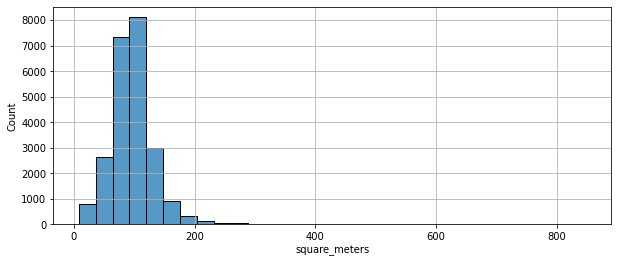

In [109]:
plt.figure(figsize=(10, 4))
sns.histplot(data.square_meters, bins=30)
plt.grid();

Видим отдельные значения справа, посмотрим на них:

In [110]:
data.query('square_meters > 400').sort_values('square_meters', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,area_category,area_type,square_meters
17172,14,28000,33.00,2019-04-30,1,3.5,5,19.0,2,False,...,23403,1462,3,342,3,27,<NA>,F,город,848.48
4859,16,28000,33.00,2019-04-29,1,3.5,5,19.0,2,False,...,23447,1376,3,344,3,119,<NA>,F,город,848.48
8322,20,39900,55.30,2017-10-26,1,3.0,6,35.0,4,False,...,25685,2136,1,72,3,202,<NA>,E,город,721.52
21238,1,24413,38.12,2018-06-27,1,2.7,10,16.8,4,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,44,F,город,640.42
22869,0,15000,25.00,2018-07-25,1,10.0,5,14.0,5,True,...,34963,8283,1,223,3,30,19,G,город,600.00
12916,6,39990,67.70,2015-06-25,3,3.1,7,42.9,6,False,...,25685,2136,1,72,3,202,<NA>,D,город,590.69
8455,18,39744,72.40,2018-09-19,2,3.0,11,41.5,7,False,...,31532,4624,1,2218,2,99,90,D,город,548.95
16732,20,35000,74.80,2018-04-01,2,3.3,7,37.3,3,False,...,26316,6655,3,187,1,616,180,D,город,467.91
15883,2,36000,80.00,2018-11-21,1,3.4,7,33.0,6,False,...,33024,6116,2,51,3,296,27,C,город,450.00
10377,15,33000,75.00,2019-03-15,2,3.8,6,63.0,1,False,...,21860,318,2,160,3,569,<NA>,D,город,440.00


Не знаю стоят они того или нет, но я бы эти объявления не читывал.

In [111]:
data = data.loc[data['square_meters'] < 400]

In [112]:
data[['square_meters']].describe().T

,count,mean,std,min,25%,50%,75%,max
square_meters,23466.0,96.845697,36.359629,7.96,76.3425,94.685,113.4575,392.35


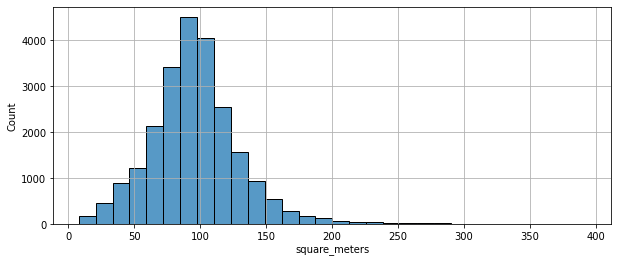

In [113]:
plt.figure(figsize=(10, 4))
sns.histplot(data.square_meters, bins=30)
plt.grid();

Так выглядит получше.

**publication_week_day** - день недели публикации.

0 - это понедельник
6 - воскресенье
**publication_month** - месяц публикации

**publication_year**- публикации год

In [114]:
data['publication_week_day'] = (data['first_day_exposition'].dt.weekday).astype('int64')
data['publication_month'] = (data['first_day_exposition'].dt.month).astype('int64')
data['publication_year'] = (data['first_day_exposition'].dt.year).astype('int64')

<AxesSubplot:>

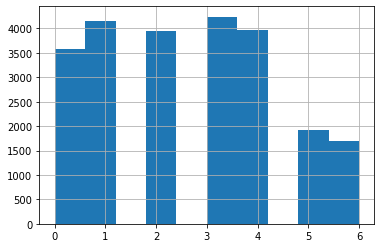

In [115]:
data['publication_week_day'].hist()

Люди не любят заниматься делами в выходныен дни, вот и объявления чаще публикуются в  будние дни.

<AxesSubplot:>

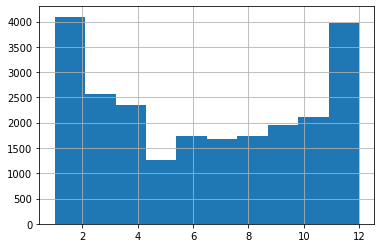

In [116]:
data['publication_month'].hist()

Зимой чаще посещает идея о продаже квартиры.

<AxesSubplot:>

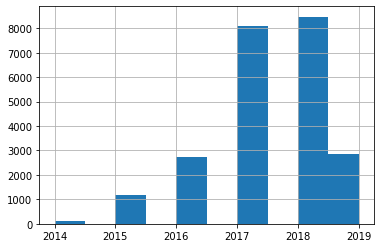

In [117]:
data['publication_year'].hist()

Популярность портала растет, с каждым годом количество публикаций растет.

**apartment_floor_type** - тип этажа квартиры: "первый", "последний" и "другой":

In [118]:
def category_floor(row):
    if row['floor'] == 1:
        return 'Первый'
    elif row['floor'] == row['floors_total']:
        return 'Последний'
    return 'Другой'
    
data['apartment_floor_type'] = data.apply(category_floor, axis=1)

<AxesSubplot:>

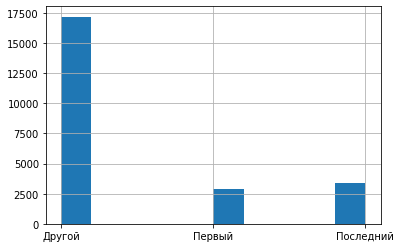

In [119]:
data['apartment_floor_type'].hist()

Первых и последних этажей около 6-ти тысяч, примерно треть всех объявлений.

**distance_city_center_km** - добавим расстояние до центра города в километрах:

In [120]:
data['distance_city_center_km'] = data['city_centers_nearest'] / 1000
data['distance_city_center_km'] = data['distance_city_center_km'].astype('Int64')

In [121]:
data[['distance_city_center_km']].describe().T

,count,mean,std,min,25%,50%,75%,max
distance_city_center_km,17953.0,13.810227,8.593535,0.0,9.0,13.0,16.0,65.0


<AxesSubplot:>

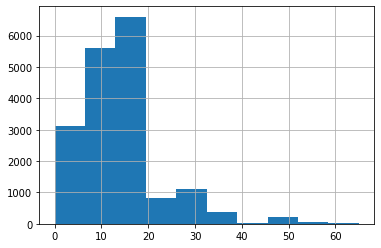

In [122]:
data['distance_city_center_km'].hist()

Большая часть объявлений не дальше 20км от центра,.

В итоге получаем таблицу вида:

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23466 entries, 21085 to 23698
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23466 non-null  int64         
 1   last_price               23466 non-null  int64         
 2   total_area               23466 non-null  float64       
 3   first_day_exposition     23466 non-null  datetime64[ns]
 4   rooms                    23466 non-null  int64         
 5   ceiling_height           23466 non-null  float64       
 6   floors_total             23466 non-null  int64         
 7   living_area              23466 non-null  float64       
 8   floor                    23466 non-null  int64         
 9   is_apartment             23466 non-null  bool          
 10  studio                   23466 non-null  bool          
 11  open_plan                23466 non-null  bool          
 12  kitchen_area             234

на данном этапе мыn посчитали и добавили в таблицу новые признаки:
- square_meters - цена за квадратный метр - убрали несколько неадекватно дорогих за 1 кв.м.
- day_publication_in_week - день публикации
- publication_month - месяц публикации
- publication_year - год публикации
- apartment_floor_type - тип этажа квартиры
- distance_to_the_city_center_in_km - расстояние до центра города в км


## Проведите исследовательский анализ данных

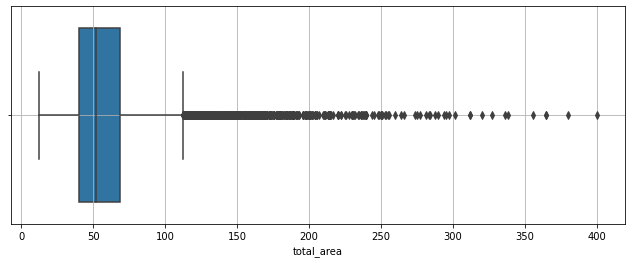

In [124]:
plt.figure(figsize=(11, 4))
sns.boxplot(x=data['total_area'])
plt.grid();

In [125]:
data['total_area'].describe().round(2)

count    23466.00
mean        58.64
std         28.76
min         12.16
25%         40.00
50%         52.00
75%         69.00
max        400.00
Name: total_area, dtype: float64

Медиана на 52 квадратных метрах, в основной масее объявлений квартиры от 40 до 69 действительно похоже на среднее жилье для крупного города. Мы окинули аномально большие квартиры, ограничив выборку 400-ми метрами.

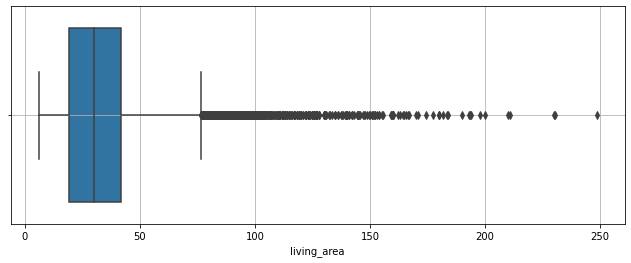

In [126]:
plt.figure(figsize=(11, 4))
sns.boxplot(x=data['living_area'])
plt.grid();

In [127]:
data['living_area'].describe().round(2)

count    23466.00
mean        33.62
std         18.63
min          6.00
25%         19.00
50%         30.00
75%         42.00
max        248.50
Name: living_area, dtype: float64

Жилая ~50 минус кухни, коридоры, санузлы, кладовые, встроенные шкафы, балконы и лоджии.... 30 метров в медиане - похоже на правду. 6 метров - явно однокомнатная квартира и точно не студия, а вот максимальная 248, а если там еще и кухня 100м - мечта.

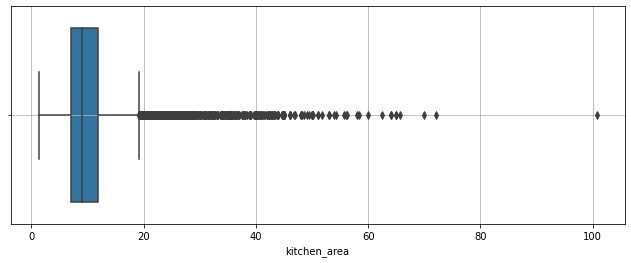

In [128]:
plt.figure(figsize=(11, 4))
sns.boxplot(x=data['kitchen_area'])
plt.grid();

Срдний размер кухни от 7 до 11 метров, медианное значение - 9. Есть несчастные люди, у которых плита еле помещается в скромный уголок 1.3 метра, а есть счастливые обладатели кухни больше средней квартиры в 2 раза.

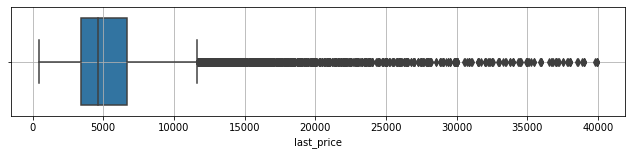

In [129]:
plt.figure(figsize=(11, 2))
sns.boxplot(x=data['last_price'])
plt.grid();

Отклонение 4.5 млн, а максимальная стоимость после обработки не превышает 40 млн. руб.

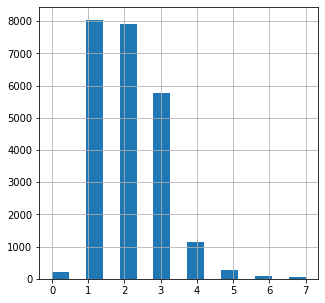

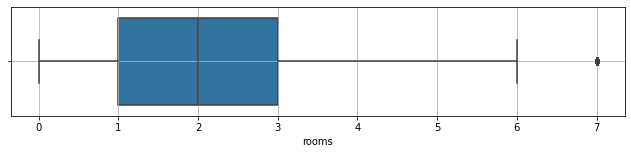

In [130]:
data['rooms'].hist(bins=15, figsize=(5, 5))
plt.figure(figsize=(11, 2))
sns.boxplot(x=data['rooms'])
plt.grid();

В основном продаются 1-2х комнатные квартиры, около 8000 объявлений, трешек четь меньше. Стдудий на рынке пока мало, но больше чем 6-7 комнатных квартир.

,count,mean,std,min,25%,50%,75%,max
ceiling_height,23466.0,2.716134,0.224091,2.5,2.6,2.7,2.7,10.3


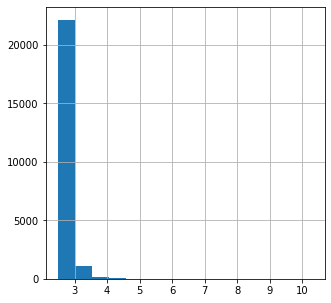

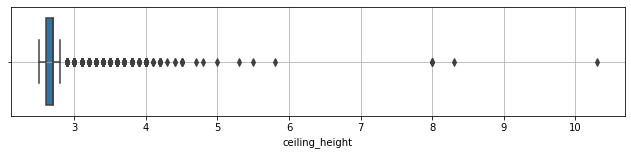

In [131]:
data['ceiling_height'].hist(bins=15, figsize=(5, 5))
plt.figure(figsize=(11, 2))
sns.boxplot(x=data['ceiling_height'])
plt.grid();
data[['ceiling_height']].describe().T

В основном высота потолка стандартная +/- 2.7м Вдидимо старый фонд с выостой около 3.5 представлен мало, однако есть и редкие представители видимо многоуровневых кварти с высотой потолка больше 10м.

,count,mean,std,min,25%,50%,75%,max
floor,23466.0,5.901858,4.89847,1.0,2.0,4.0,8.0,33.0


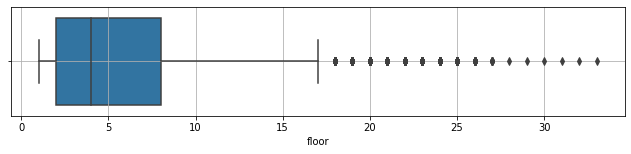

In [132]:
plt.figure(figsize=(11, 2))
sns.boxplot(x=data['floor'])
plt.grid();
data[['floor']].describe().T

В основном количестве объявлений квартиры со 2 по 8й этаж - средние этажи типовых девятиэтажных домов, первые и последние этажи не в фаворе.

,count,mean,std,min,25%,50%,75%,max
floors_total,23466.0,10.703145,6.598336,1.0,5.0,9.0,16.0,37.0


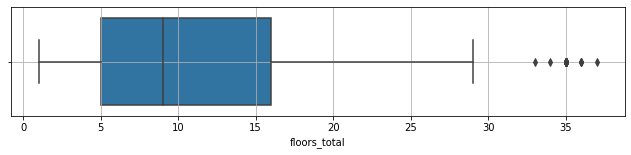

In [133]:
plt.figure(figsize=(11, 2))
sns.boxplot(x=data['floors_total'])
plt.grid();
data[['floors_total']].describe().T

А нет ошибся, есть еще и 16ти этажные здания, и "Хрущевские" пятиэтажки. 

,count,mean,std,min,25%,50%,75%,max
airports_nearest,17933.0,28825.747895,12691.390857,0.0,18503.0,26781.0,37407.0,84869.0


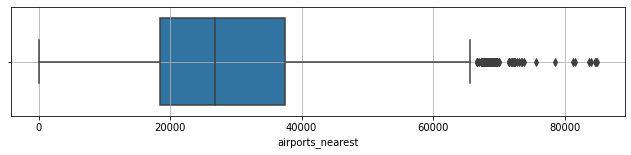

In [134]:
plt.figure(figsize=(11, 2))
sns.boxplot(x=data['airports_nearest'])
plt.grid();
data[['airports_nearest']].describe().T

от 18 до 37 км до ближайшего аэропорта, по меркам большого города - близко, а вот максимальное значение ~85км. 

,count,mean,std,min,25%,50%,75%,max
city_centers_nearest,17953.0,14306.397092,8590.930525,181.0,9466.0,13168.0,16360.0,65968.0


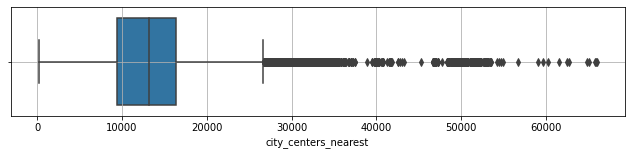

In [135]:
plt.figure(figsize=(11, 2))
sns.boxplot(x=data['city_centers_nearest'])
plt.grid();
data[['city_centers_nearest']].describe().T

Основная масса в кольце от 9 до 16км вокруг центра. Мкаксимальное расстояние от центра - 66 км.

,count,mean,std,min,25%,50%,75%,max
ponds_nearest,8932.0,521.272727,277.846642,13.0,298.0,505.0,733.0,1344.0


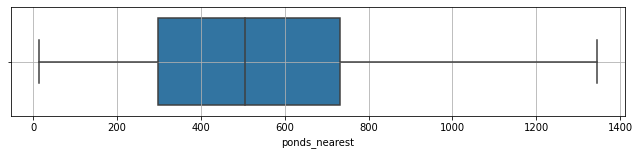

In [136]:
plt.figure(figsize=(11, 2))
sns.boxplot(x=data['ponds_nearest'])
plt.grid();
data[['ponds_nearest']].describe().T

До ближайшего водоема ~500м +/- 200м, было бы странно, еслибы в Питере было иначе.

,count,mean,std,min,25%,50%,75%,max
parks_nearest,7899.0,492.930244,342.276825,1.0,289.0,456.0,613.0,3190.0


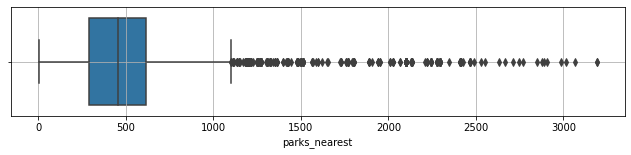

In [137]:
plt.figure(figsize=(11, 2))
sns.boxplot(x=data['parks_nearest'])
plt.grid();
data[['parks_nearest']].describe().T

С парками ситуация схожа, в среднем около 500 метров до близжайшего парка. Хотя некоторым и не везет - до парка 3км

**Как быстро продавались квартиры?** 

In [138]:
data['days_exposition'].describe()

count    20342.000000
mean       179.629486
std        218.548121
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

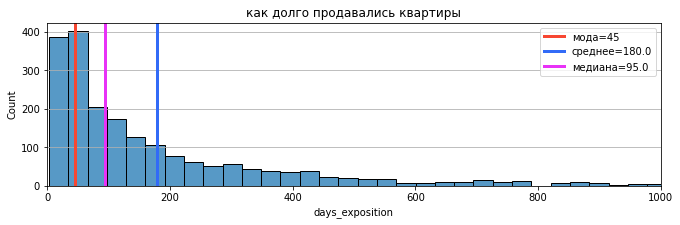

In [139]:
median_exp = data['days_exposition'].median()
mode_exp = data['days_exposition'].mode().values[0]
mean_exp = data['days_exposition'].mean()
plt.figure(figsize=(11, 3))
sns.histplot(data=data[::10], x='days_exposition')
plt.title('как долго продавались квартиры')
plt.xlim((0, 1000))
plt.axvline(x=mode_exp, label=f'мода={mode_exp}', lw=3, c='#F74732')
plt.axvline(x=mean_exp, label=f'среднее={np.round(mean_exp)}', lw=3, c='#326BF7')
plt.axvline(x=median_exp, label=f'медиана={np.round(median_exp)}', lw=3, c='#E832F7')
plt.legend()
plt.grid(axis='y');

Продавались квартиры по разному, чаще всего хватает 45дней на то, чтобы продать(или передумать), ну а в среднем на продажу уходит от 3-х месяцев до полугода.

,count,mean,std,min,25%,50%,75%,max
days_exposition,20342.0,179.629486,218.548121,1.0,45.0,95.0,229.0,1580.0


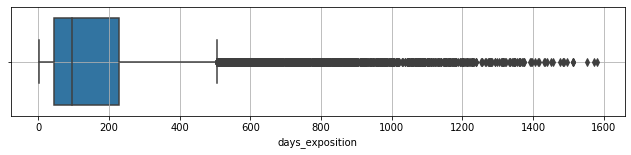

In [140]:
plt.figure(figsize=(11, 2))
sns.boxplot(x=data['days_exposition'])
plt.grid();
data[['days_exposition']].describe().T

Посмотрим на зависимость стоимости от различных факторов, для начала посчитаем Коэффициент корреляции

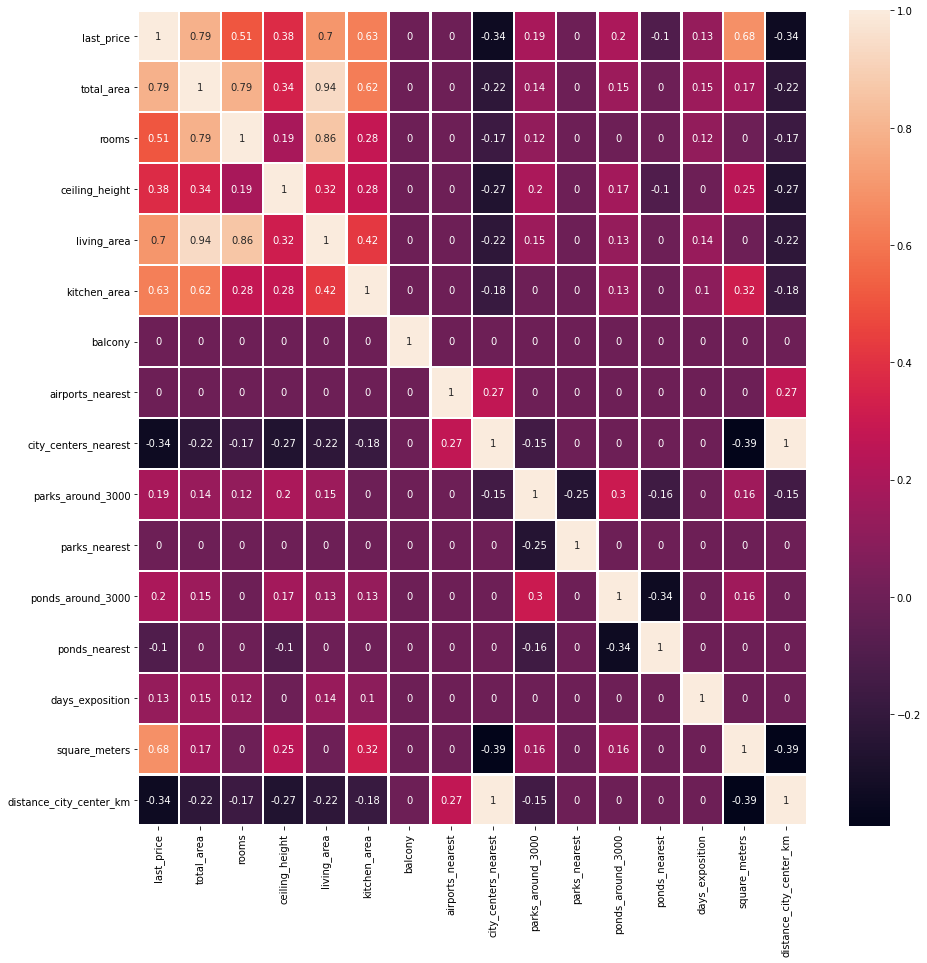

In [141]:
corr_data = data[['last_price', 'total_area', 'rooms', 'ceiling_height', 
           'living_area', 'kitchen_area', 'balcony', 'airports_nearest', 
           'city_centers_nearest', 'parks_around_3000', 'parks_nearest', 
           'ponds_around_3000', 'ponds_nearest', 'days_exposition', 
           'square_meters', 'apartment_floor_type', 'distance_city_center_km']]

plt.figure(figsize = (15, 15))
corr_matrix = corr_data.corr()
corr_matrix = corr_matrix.round(2)
corr_matrix[np.abs(corr_matrix) < 0.1] = 0
sns.heatmap(corr_matrix, annot=True, linewidths=1.5)
plt.show()

Видим высоку прямую зависимость от показателей связанных с площадью и количеством комнат, что выглядит вполне логично. Так же видим небольшую обратную зависимость от расположения, по мере отдаления от центра цена снижается.ПОсмотрим на эти признаки поближе.

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='living_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='living_area'>,
   

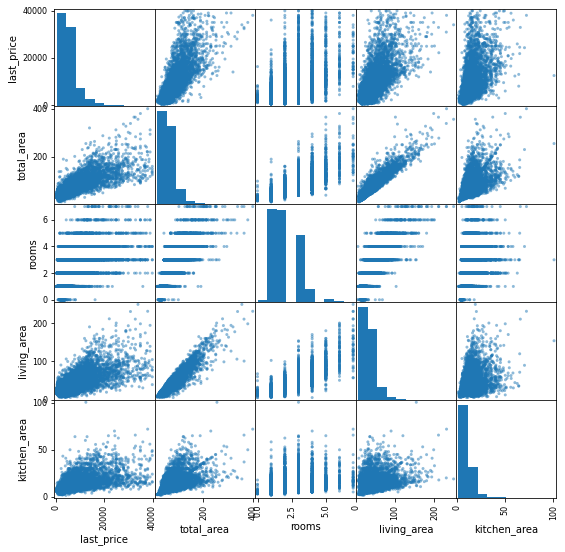

In [142]:
corr = data[['last_price', 'total_area', 'rooms', 'living_area', 'kitchen_area', 'apartment_floor_type']]
pd.plotting.scatter_matrix(corr, figsize=(9, 9)) 

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

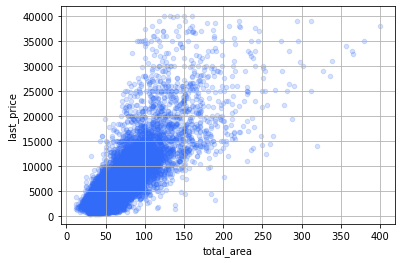

In [143]:
data.plot(x='total_area', y='last_price', kind='scatter', color='#326BF7', grid=True, alpha=0.2)

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

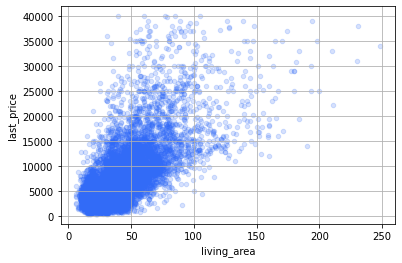

In [144]:
data.plot(x='living_area', y='last_price', kind='scatter', color='#326BF7', grid=True, alpha=0.2)

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

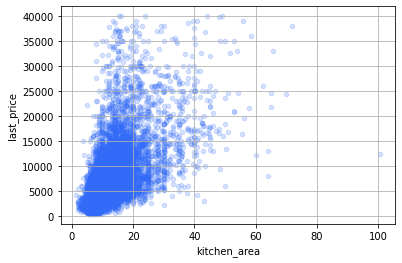

In [145]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', color='#326BF7', grid=True, alpha=0.2)

<AxesSubplot:title={'center':'floor_type'}, xlabel='rooms'>

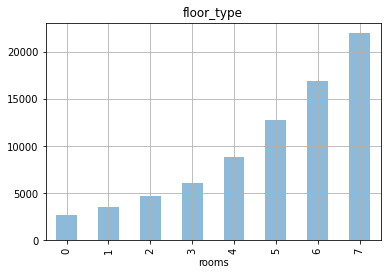

In [146]:
data.groupby('rooms')['last_price'].median().plot(kind='bar', grid=True, alpha=0.5, title = 'floor_type')

<AxesSubplot:xlabel='first_day_exposition', ylabel='last_price'>

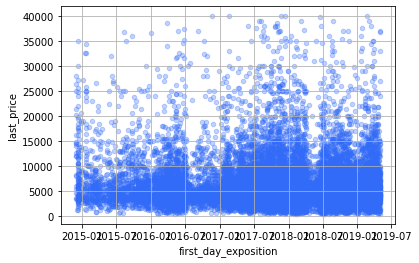

In [147]:
data.plot(x='first_day_exposition', y='last_price', kind='scatter', color='#326BF7', grid=True, alpha=0.3)

Видим постепенный рост цен.

In [148]:
day_stat = data.pivot_table(index='publication_week_day', 
                                   values='last_price', 
                                   aggfunc=['count', 'median'])
day_stat.reset_index(inplace=True)
day_stat.columns = ['день недели', 'кол-во', 'медиана']
day_stat

,день недели,кол-во,медиана
0,0,3575,4600
1,1,4144,4700
2,2,3944,4690
3,3,4239,4600
4,4,3968,4550
5,5,1911,4500
6,6,1685,4500


<AxesSubplot:>

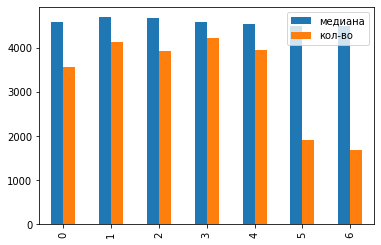

In [149]:
day_stat.plot(y=['медиана', 'кол-во'], kind='bar')

Средняя цена незначительно снижается к концу недели. 

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> К выходным цены чуть ниже

In [150]:
month_stat = data.pivot_table(index='publication_month', 
                                   values='last_price', 
                                   aggfunc=['count', 'median'])
month_stat.reset_index(inplace=True)
month_stat.columns = ['месяц', 'кол-во', 'медиана']
month_stat

,месяц,кол-во,медиана
0,1,1484,4600.0
1,2,2611,4600.0
2,3,2567,4650.0
3,4,2351,4755.0
4,5,1262,4500.0
5,6,1740,4399.5
6,7,1671,4600.0
7,8,1735,4550.0
8,9,1963,4658.0
9,10,2114,4550.0


<AxesSubplot:>

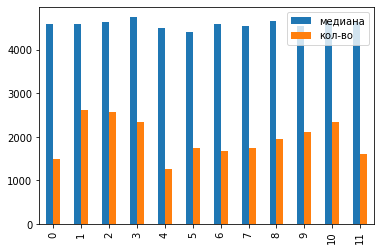

In [151]:
month_stat.plot(y=['медиана', 'кол-во'], kind='bar')

Средняя цена незначительно колеблется, пик приходится на апрель, минимальное значение в мае, зависимости от сезона не наблюдается.

In [152]:
year_stat = data.pivot_table(index='publication_year', 
                                   values='last_price', 
                                   aggfunc=['count', 'median'])
year_stat.reset_index(inplace=True)
year_stat.columns = ['год', 'кол-во', 'медиана']
year_stat

,год,кол-во,медиана
0,2014,130,7488.5
1,2015,1160,5250.0
2,2016,2745,4500.0
3,2017,8108,4500.0
4,2018,8472,4550.0
5,2019,2851,5000.0


<AxesSubplot:>

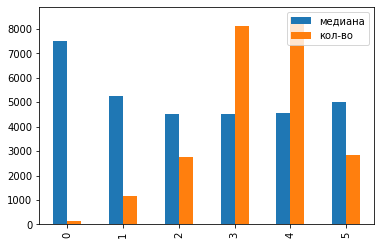

In [153]:
year_stat.plot(y=['медиана', 'кол-во'], kind='bar')

В 2014 году наблюдаем максимальную среднюю стоимость квартир, после чего произошел резкий спад, в 2015 сердняя цена снизилась на 2.3 млн.руб, в следующем году понизилась еще на ~ 700 тыс.руб и стабилизировалась вплоть до 2019г. - где мым снова нблюдаем рост. Данные у нас только за первое полугодие 2019 и ситуация может измениться. 

**Этаж и цена**

In [154]:
share_of_floors = data.pivot_table(index='apartment_floor_type', 
                                 values='last_price').reset_index().round()
share_of_floors

,apartment_floor_type,last_price
0,Другой,6099.0
1,Первый,4576.0
2,Последний,5753.0


<AxesSubplot:>

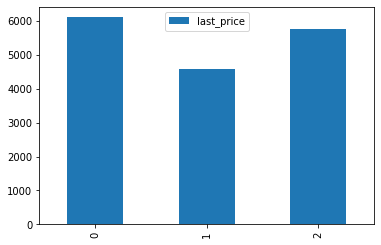

In [155]:
share_of_floors.plot(kind='bar')

Первый этаж самый непопулярный, потому и самый дешевый. Средняя цена последнего этажа отличается не так сильно.

**посчитаем среднюю цену одного квадратного метра для топ-10 населенных пунктов:**

In [156]:
top_10 = data['locality_name'].value_counts().head(10)
top_10 = data.query('locality_name in @top_10.index').pivot_table(
    index='locality_name', values='square_meters')
top_10.reset_index(inplace=True)
top_10.columns = ['название', 'стоимость_метра']
top_10.sort_values(by='стоимость_метра', ascending=False)

,название,стоимость_метра
8,Санкт-Петербург,111.211887
7,Пушкин,103.100978
4,Кудрово,95.297881
6,Парголово,90.112599
5,Мурино,85.886058
9,Шушары,78.664331
3,Колпино,75.287041
2,Гатчина,68.667231
0,Всеволожск,67.150251
1,Выборг,58.117215


<AxesSubplot:>

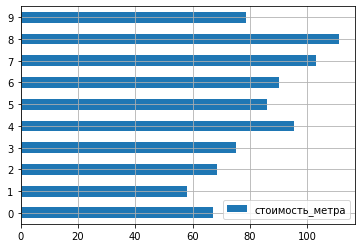

In [157]:
top_10.plot(kind='barh', grid=True)

Видим, что в Санкт-Петербурге самый дорогой квадратный метр, как и ожидалось, на втором месте Пушкин, дешевле всего поселиться в Выборге, так что чем дальше от северной столицы, тем дешевле.

**Среднюю цену километра Питера**

In [158]:
price_km = data[data['locality_name'] == 'Санкт-Петербург'].groupby(
    'distance_city_center_km')['square_meters'].mean().round(2)
price_km.head(30)

distance_city_center_km
0     138.62
1     133.28
2     122.03
3     120.40
4     132.77
5     134.21
6     137.11
7     130.51
8     119.54
9     110.31
10    111.25
11    106.67
12    108.22
13    107.16
14    104.93
15    101.88
16    100.01
17     93.94
18     94.80
19     95.38
20    106.85
21     91.39
22     88.71
23     91.32
24     82.44
25     91.14
26     75.17
27    132.12
28     81.84
29     62.48
Name: square_meters, dtype: float64

<AxesSubplot:xlabel='distance_city_center_km'>

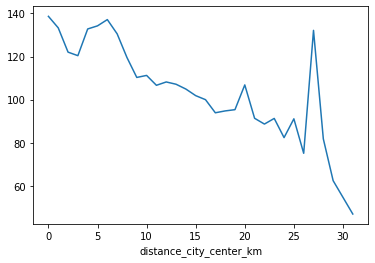

In [159]:
price_km.plot()

In [160]:
data.query('distance_city_center_km == 27')['locality_name']

20481    Александровская
670      Александровская
556               Пушкин
2929              Пушкин
7103              Пушкин
              ...       
1184        Металлострой
86          Металлострой
21062       Металлострой
6849        Металлострой
15205           Песочный
Name: locality_name, Length: 95, dtype: object

Чем дальше от центра тем дешевле, исключение 27 км - скорее всего Пушкин - наше второе место по стоимости квадратного метра.

In [161]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,area_category,area_type,square_meters,publication_week_day,publication_month,publication_year,apartment_floor_type,distance_city_center_km
21085,0,7000,34.7,2018-09-23,1,2.7,9,19.8,3,False,...,<NA>,60,F,город,201.73,6,9,2018,Другой,22
12899,8,4199,56.0,2017-12-21,2,2.7,9,27.0,5,False,...,444,24,E,город,74.98,3,12,2017,Другой,17
4017,7,2268,35.0,2017-12-21,1,2.7,9,14.0,6,False,...,444,25,F,город,64.80,3,12,2017,Другой,17
7778,9,2750,29.0,2017-02-19,1,2.5,4,15.0,1,False,...,<NA>,43,F,город,94.83,6,2,2017,Первый,21
23150,3,6490,62.5,2015-03-18,2,2.7,24,33.5,15,False,...,<NA>,917,D,город,103.84,2,3,2015,Другой,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100,62.8,2018-09-18,4,2.5,5,45.5,3,False,...,<NA>,<NA>,D,поселок,33.44,1,9,2018,Другой,<NA>
23692,2,1350,30.0,2017-07-07,1,2.7,5,17.5,4,False,...,<NA>,413,F,город,45.00,4,7,2017,Другой,<NA>
23695,14,3100,59.0,2018-01-15,3,2.7,5,38.0,4,False,...,<NA>,45,E,город,52.54,0,1,2018,Другой,<NA>
23696,18,2500,56.7,2018-02-11,2,2.7,3,29.7,1,False,...,<NA>,<NA>,E,село,44.09,6,2,2018,Первый,<NA>


## Общий вывод

В это м проекте мы изучили набор объявлений о продаже квартир в Санкт-Петербурге и области за 2014-2019гг. с целью найти интересные особенности и зависимости, которые существуют на рынке недвижимости. Для достижения поставленной задачи мы выполнили ряд действий:


- рассмотрели каждый признак:
    - изменили тип данных некоторых признаков для удобства обработки;
    - заполнили пропуски значений, там где посчитали необходимым;
    - исправили некоторые явные ошибки;
    - избавились от дубликатов
- добавили к данным несколько новых признаков:
    - создали новую категоризацию по площади;
    - стоимость одного квадратног метра;
    - разделили дату публикации на день недели, месяц и год;
    - разделили параметр населенный пункт на имя и тип поселения.
- проанализировали влияние разных признаков на целевую переменную - цену на момент снятия объявления с публикации.

В результате пришли к следующим выводам:

- Цена на недвижимость в Санкт-Петербурге снижается при отдалении от центра(исключение г.Пушкин - почти соперник столицы).
- на цену недвижимости сильно влияют площадь (общая, жилая, кухни), количество комнат стоимость. Что логично, чем больше площадь или количество комнат, тем выше цена.
- первые этаж самый непопулярный и в следствии самые дешевые.
- 45 дней - зачастую достаточно, чтобы продать квартиру, ну либо передумать. Среднее время по всем объявлениям - 95 дней.
- Идея о продаже квартиры чаще посещает зимой.
- у стоимости недвижимости нет  сезонной активности, цена в объявлениях устойчива.
- в выходные активность пользователей снижается.
- с 2014г средняя цена недвижимости снизилась, однако в 2019г начала возвращать свои позиции.
- Портал с объявлениями набирет обороты

Необходимо привести заполнения поля с азванием населенного пункта к единой форме: 
    - Создать словарь всех возможныхзначений;
    - обязать пользователй выбирать из предлагаемых значений.
это облегчит получение дополнительной картографической информации.
